In [67]:
import jla_data_fix as jla

def read_data(fname="../data/union_21_data.csv", delimiter="\t", cols=(1,2,3)):
    """Reads data

    Output
    ------
    z: z array
    m: magnitude array
    m_err: magnitude error array"""
    
    raw = np.loadtxt(fname, delimiter=delimiter, usecols=cols, skiprows=1)
    return raw[:,0], raw[:,1] - 19.3, raw[:,2]

In [68]:
uz, umsb, umsbe = read_data()

In [69]:
jz = hstack(jla.zs)
jmsb = hstack(jla.msbs)
jmsbe = hstack(jla.msbes)

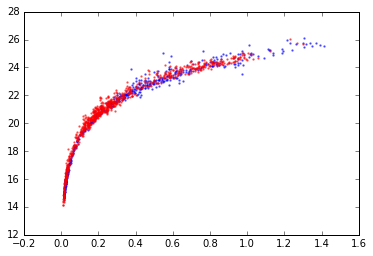

In [70]:
scatter(uz, umsb, color='b', alpha=0.5, s=2)
scatter(jz, jmsb, color='r', alpha=0.5, s=2)


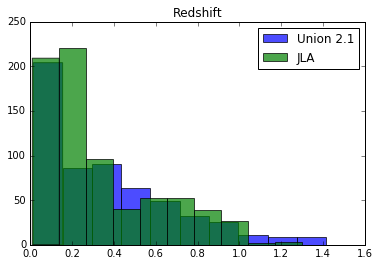

In [71]:
hist(uz, label="Union 2.1", alpha=0.7)
hist(jz, alpha=0.7, label="JLA")
legend()
title('Redshift')

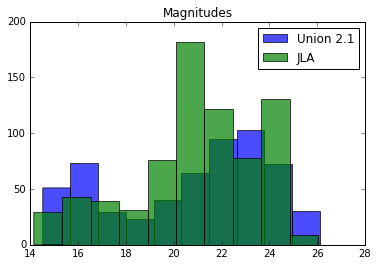

In [72]:
hist(umsb, label="Union 2.1", alpha=0.7)
hist(jmsb, alpha=0.7, label="JLA")
legend()
title('Magnitudes')

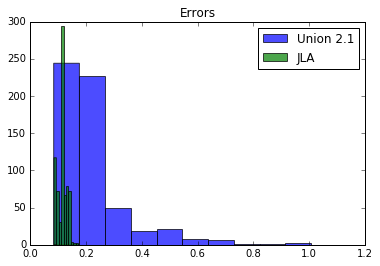

In [73]:
hist(umsbe, label="Union 2.1", alpha=0.7)
hist(jmsbe, alpha=0.7, label="JLA")
legend()
title('Errors')

In [74]:
jlz, jlmsb, jlmsbe = read_data("../data/jla_just3_data.csv", ",", (0, 1, 2))
jlmsb = jlmsb + 19.3

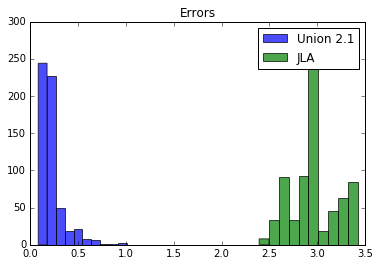

In [75]:
# try again with slightly diffefrent jla dataset

hist(umsbe, label="Union 2.1", alpha=0.7)
hist(1/sqrt(jlmsbe), alpha=0.7, label="JLA")
legend()
title('Errors')

In [76]:
# Cosmology

zlim = 0.05

H0 = 2.27e-18
sol = 3e8

def H(z, params):
    '''Implements the Friedmann equation'''
    b = params[1]
    model = (b)*((1+z)**3) + (1-b)
    return H0*sqrt(model)


def integrand(z, params):
    '''Pass-throguh inverse for H(z)'''
    return 1/H(z, params)


def lum(z, params):
    if z>zlim:
        output = si.quad(integrand, 0, z, args=(params))
        val = output[0]
    else:
        val = z/H0
    return sol * val


def flux(z, params):
    lp = params[0]
    model = lp/((4*pi)*(((1+z)*(lum(z, params)))**2))
    return model


def mc(z, params):
    '''Calculated magnitude'''
    # select values out of pandas dataframe

    return (-20.45 - 2.5*log10(1e-4 * flux(z, params)))


def mt(name):
    '''True magnitude'''
    return jla.loc[jla['name']==name]['msb']



def mccf(z, x, y):
    '''Passthrough'''
    params = [x,y]
    return vmc(z, params)

def mccf2(z, y):
    '''Passthrough'''
    params = [4.17,y]
    return vmc(z, params)

vmc = vectorize(mc)
vmc.excluded.add(1)


In [77]:
from scipy.optimize import curve_fit

In [78]:

jlafit = curve_fit(mccf, jlz, jlmsb, p0=(4e39, 0.3))

In [79]:
ufit = curve_fit(mccf, uz, umsb, p0=(4e39, 0.3))

(0, 0.2)

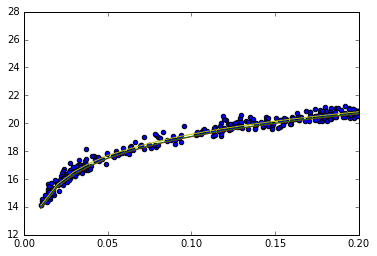

In [84]:
z = arange(0, 1.5, 0.01)
scatter(jlz, jlmsb)
plot(z, vmc(z, jlafit[0]), color='y')
plot(z, vmc(z, ufit[0]), color='r')
myparams = array([4e39, 0.3])
plot(z, vmc(z, myparams), color='g')

xlim(0, 0.2)

In [81]:
ufit

(array([  4.11161567e+39,   2.60298758e-01]),
 array([[  4.04927624e+75,  -1.13973609e+36],
        [ -1.13973609e+36,   5.65040861e-04]]))

In [82]:
jlafit

(array([  3.37353917e+39,   4.83339798e-01]),
 array([[  2.93942502e+75,  -1.55066412e+36],
        [ -1.55066412e+36,   1.25901214e-03]]))

(0.5, 0.7)

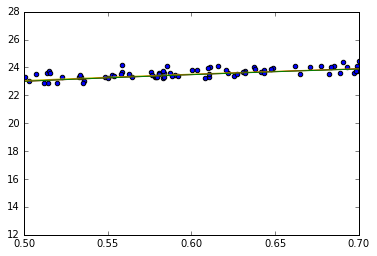

In [85]:
z = arange(0, 1.5, 0.01)
scatter(jlz, jlmsb)
plot(z, vmc(z, jlafit[0]), color='y')
plot(z, vmc(z, ufit[0]), color='r')
myparams = array([4e39, 0.3])
plot(z, vmc(z, myparams), color='g')

xlim(0.5, 0.7)